# Applied ML : Assignment 1
## SMS Spam Classification
## Abhinav Malik | MDS202401

### Preparing the data

In [1]:
# Importing needed libraries
import csv
import os
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Downloading needed NLTK datasets
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Reading the dataset
df = pd.read_csv("SMSSpamCollection", sep="\t",
                 quoting=csv.QUOTE_NONE, names=["label", "message"])

print("Total number of SMSs:", len(df))
print("\nSample of SMS file \n", df.head(10))

Total number of SMSs: 5574

Sample of SMS file 
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Check dataset info
print(df.info())

# Check statistics for 'ham' and 'spam' labels
print("\nLabel Statistics:")
print(df.groupby('label').describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Label Statistics:
      message                                                               
        count unique                                                top freq
label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4


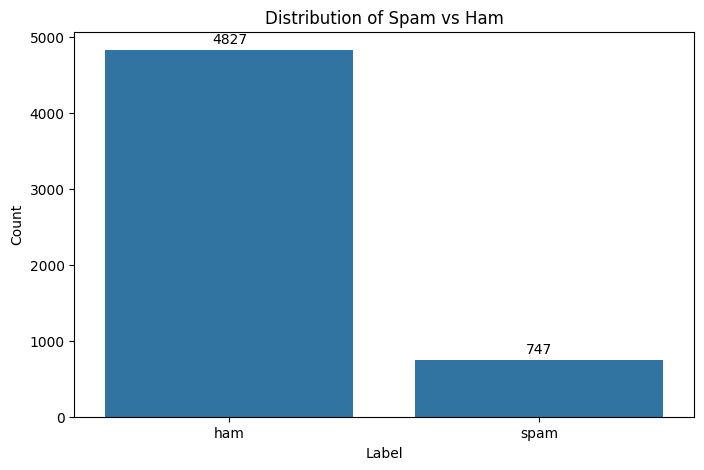

In [7]:
# Distribution of ham vs spam
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)

plt.title("Distribution of Spam vs Ham")
plt.xlabel("Label")
plt.ylabel("Count")

for i, count in enumerate(label_counts.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

Message Length Statistics:
count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64


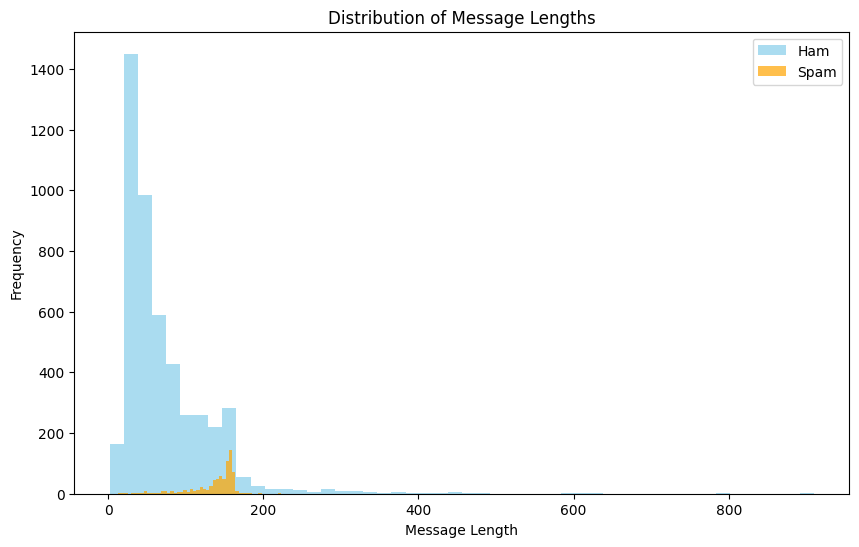

In [8]:
# Preprocessing: Convert labels to binary (spam=1, ham=0)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

df['message_length'] = df['message'].apply(len)

# Print Message Length Statistics
print("Message Length Statistics:")
print(df['message_length'].describe())

# Plot Distribution of Message Lengths
plt.figure(figsize=(10, 6))
plt.hist(df[df['label'] == 0]['message_length'], bins=50, alpha=0.7, label='Ham', color='skyblue')
plt.hist(df[df['label'] == 1]['message_length'], bins=50, alpha=0.7, label='Spam', color='orange')

plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
def split_data(df, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    """Split a DataFrame into train, validation, and test sets."""
    
    # Split into training and temporary (validation + test) sets
    train_df, temp_df = train_test_split(
        df, train_size=train_size, random_state=random_state
    )
    
    # Split the temporary set into validation and test sets
    relative_val_size = val_size / (val_size + test_size)
    val_df, test_df = train_test_split(
        temp_df, train_size=relative_val_size, random_state=random_state
    )
    
    return train_df, val_df, test_df


def save_splits(train_df, val_df, test_df):
    """Save dataset splits as CSV files."""
    
    train_df.to_csv("train.csv", index=False)
    val_df.to_csv("validation.csv", index=False)
    test_df.to_csv("test.csv", index=False)
    
    print("Files saved successfully: train.csv, validation.csv, test.csv")


# Run the split and save process
train_df, val_df, test_df = split_data(df)
save_splits(train_df, val_df, test_df)

# Print shapes to confirm correct splitting
print(f"Train set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")

Files saved successfully: train.csv, validation.csv, test.csv
Train set shape: (3901, 3)
Validation set shape: (836, 3)
Test set shape: (837, 3)
